# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
# from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [ ]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs.

In [ ]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

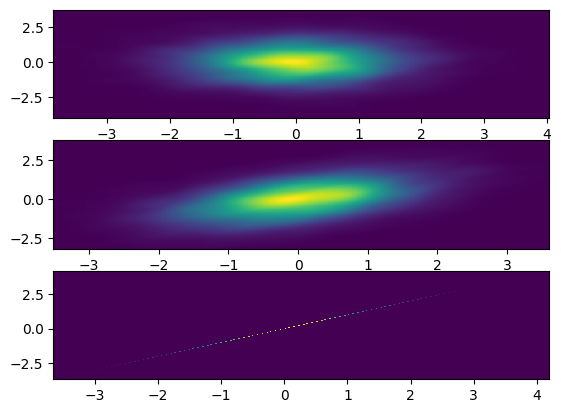

In [ ]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)

# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [ ]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

In [14]:
def compute_pearson_and_MI(rho):
  n = 5000
  data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
  pearson_cor = pearsonr(data_2d[:,0], data_2d[:,1])[0]

  #discretization of variables
  x=data_2d[:,0]
  y=data_2d[:,1]
  bin_x = np.linspace(x.min(), x.max(), 10)
  bin_y = np.linspace(y.min(), y.max(), 10)

  discretized_x = np.digitize(x, bin_x)
  discretized_y = np.digitize(y, bin_y)

  mi = mutual_info_score(discretized_x, discretized_y)

  return pearson_cor, mi

In [15]:
pearson_cor_test, mi_test = compute_pearson_and_MI(0.5)
print(pearson_cor_test, mi_test)

0.49781598844864755 0.13164770089666855


In [16]:
pearson_cor_test, mi_test = compute_pearson_and_MI(0.7)
print(pearson_cor_test, mi_test)

0.7149466233377462 0.3078959561708519


In [17]:
pearson_cor_test, mi_test = compute_pearson_and_MI(0.2)
print(pearson_cor_test, mi_test)

0.18982768979968684 0.022891289672133656


#### bp 3)

In [27]:
rho_list = np.linspace(0,1,20)
N=100
pearson_results=np.zeros((len(rho_list), N))
mi_results=np.zeros((len(rho_list), N))

for small_n in range(N):
  for i, rho in enumerate(rho_list):
    pearson_results[i, small_n], mi_results[i,small_n] = compute_pearson_and_MI(rho)


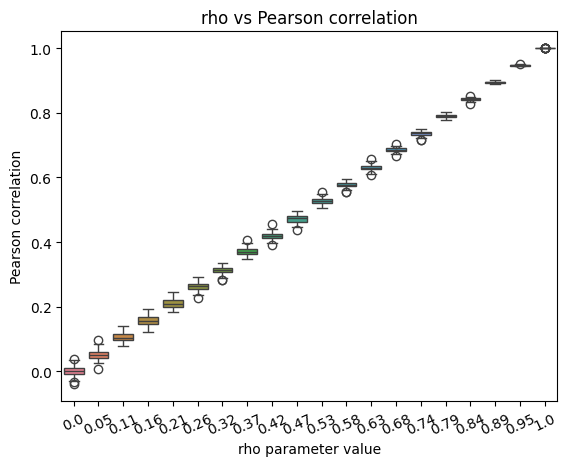

In [35]:
ax = sns.boxplot(pearson_results.T)
plt.xticks(np.arange(0,20,1), np.round(rho_list, 2),rotation=25 )
ax.set(xlabel='rho parameter value', ylabel='Pearson correlation', title='rho vs Pearson correlation')
plt.show()

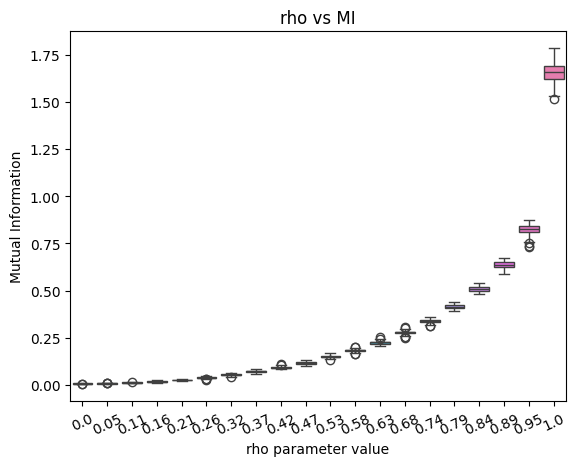

In [37]:
ax2 = sns.boxplot(mi_results.T)
plt.xticks(np.arange(0,20,1), np.round(rho_list, 2),rotation=25 )
ax2.set(xlabel='rho parameter value', ylabel='Mutual Information', title='rho vs MI')
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and

$$\Sigma = \begin{pmatrix} \sigma_x^2 & \rho \\ \rho & \sigma_y^2 \end{pmatrix}$$

equals

$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

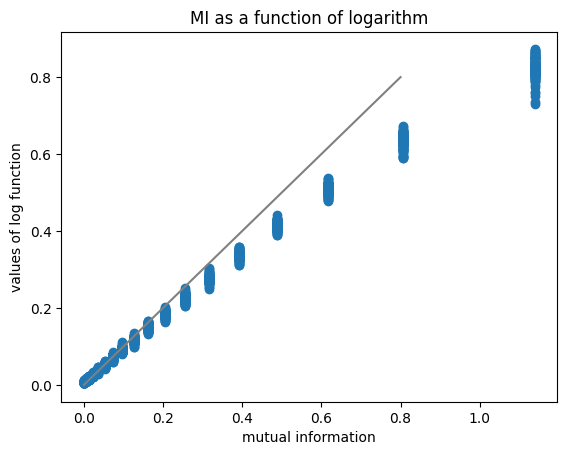

In [53]:
plt.plot(-np.log(1 - rho_list[:19]**2)/2, mi_results[:19, :], "o", color='C0')
plt.plot([0,0.8], [0, 0.8], color="gray")
plt.xlabel('mutual information')
plt.ylabel('values of log function')
plt.title('MI as a function of logarithm')
plt.show()

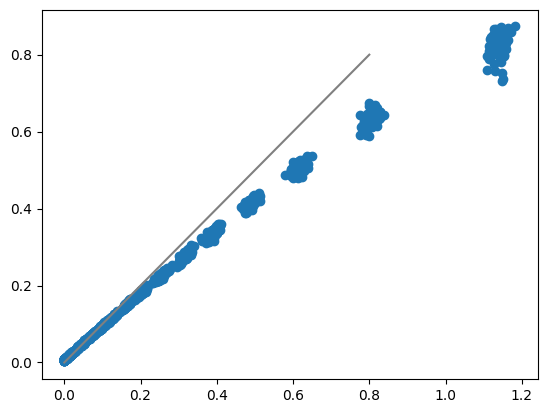

In [55]:
plt.plot(-(np.log(1 - pearson_results[:19,:].T**2)/2).flatten(), mi_results[:19,:].T.flatten(), "o")
plt.plot([0,0.8], [0, 0.8], color="gray")
plt.show()

### b)

#### bp 1)

In [ ]:
# again: this is too time consuming so here is an answer

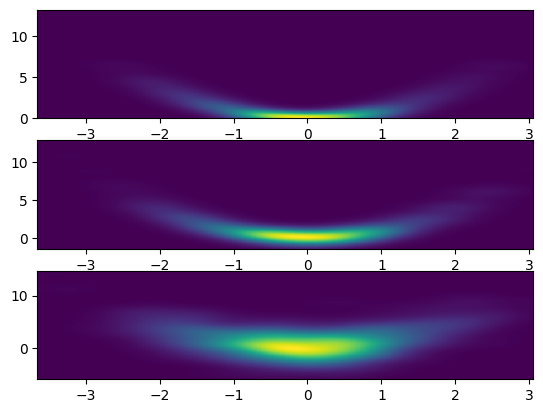

In [ ]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)

# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [64]:
def compute_pearson_and_MI2(sigma):
  n = 1000
  x=np.random.normal(0, 1, n)
  eps=np.random.normal(0, sigma, n)
  y=x**2+eps
  pearson_cor = pearsonr(x,y)[0]

  #discretization of variables
  bin_x = np.linspace(x.min(), x.max(), 10)
  bin_y = np.linspace(y.min(), y.max(), 10)

  discretized_x = np.digitize(x, bin_x)
  discretized_y = np.digitize(y, bin_y)

  mi = mutual_info_score(discretized_x, discretized_y)

  return pearson_cor, mi

In [68]:
sigma_list = np.linspace(0,1,20)
N=100
pearson_results=np.zeros((len(sigma_list), N))
mi_results=np.zeros((len(sigma_list), N))

for small_n in range(N):
  for i, sigma in enumerate(sigma_list):
    pearson_results[i, small_n], mi_results[i,small_n] = compute_pearson_and_MI2(sigma)


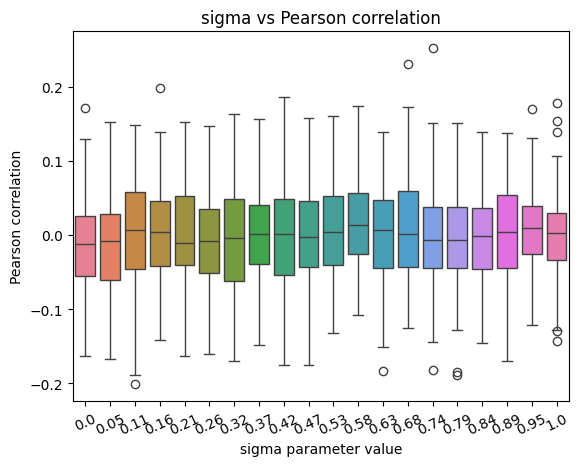

In [69]:
ax3=sns.boxplot(pearson_results.T)
plt.xticks(np.arange(0,20,1), np.round(sigma_list, 2), rotation=25)
ax3.set(xlabel='sigma parameter value', ylabel='Pearson correlation', title='sigma vs Pearson correlation')
plt.show()

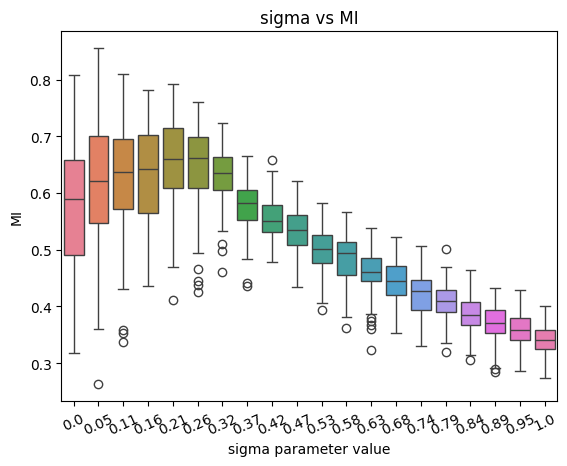

In [70]:
ax4=sns.boxplot(mi_results.T)
plt.xticks(np.arange(0,20,1), np.round(sigma_list, 2), rotation=25)
ax4.set(xlabel='sigma parameter value', ylabel='MI', title='sigma vs MI')
plt.show()

## Task 2

### a)

In [33]:
def indep_test_asymptotic(X, Y, stat):
    bin_x = np.linspace(X.min(), X.max(), 10)
    bin_y = np.linspace(Y.min(), Y.max(), 10)
    discretized_x = np.digitize(X, bin_x)
    discretized_y = np.digitize(Y, bin_y)

    if stat == "mi":

        stat_value = 2*len(discretized_x)*mutual_info_score(discretized_x, discretized_y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(discretized_x, discretized_y)))
        stat_value = test_res.statistic

    df = (len(np.unique(discretized_x)) - 1)*(len(np.unique(discretized_y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [40]:
def indep_test_permutation(X, Y, B):
    bin_x = np.linspace(X.min(), X.max(), 10)
    bin_y = np.linspace(Y.min(), Y.max(), 10)
    discretized_x = np.digitize(X, bin_x)
    discretized_y = np.digitize(Y, bin_y)

    stat_value = mutual_info_score(discretized_x, discretized_y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(discretized_x)

        stat_value_b = mutual_info_score(X_b, discretized_y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [34]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
n=1000
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
x_ind=data_2d[:,0]
y_ind=data_2d[:,1]

In [53]:
# asymptotic
stat_value_as_mi, p_value_as_mi=indep_test_asymptotic(x_ind, y_ind, "mi")

print(f"We expect p value to be above 0.05, so that we do not reject the null hypothesis. \nSo our two variables will be independent. \nP value for mi: {p_value_as_mi}. \nThey are.")

We expect p value to be above 0.05, so that we do not reject the null hypothesis. 
So our two variables will be independent. 
P value for mi: 0.5808255035413243. 
They are.


In [54]:
# Pearson’s chi-squared test
stat_value_as_chi2, p_value_as_chi2=indep_test_asymptotic(x_ind, y_ind, "chi2")

print(f"We expect p value to be above 0.05, so that we do not reject the null hypothesis. \nSo our two variables will be independent. \nP value for chi2: {p_value_as_chi2}. \nThey are.")

We expect p value to be above 0.05, so that we do not reject the null hypothesis. 
So our two variables will be independent. 
P value for chi2: 0.25192104589675035. 
They are.


In [42]:
# permutation
stat_value_per, p_value_per=indep_test_permutation(x_ind, y_ind, 100)

print(f"We expect p value to be above 0.05, so that we do not reject the null hypothesis. \nSo our two variables will be independent. \nP value: {p_value_per}. \nThey are.")

We expect p value to be above 0.05, so that we do not reject the null hypothesis. 
So our two variables will be independent. 
P value: 0.19801980198019803. 
They are.


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [36]:
# independent r.v. - ideally we will reject the null hypothesis
n = 1000
sigma=0.3
x_dep=np.random.normal(0, 1, n)
eps=np.random.normal(0, sigma, n)
y_dep=x_dep**2+eps

In [55]:
# asymptotic
stat_value_as_mi_dep, p_value_as_mi_dep=indep_test_asymptotic(x_dep, y_dep, "mi")
stat_value_as_chi2_dep, p_value_as_chi2_dep=indep_test_asymptotic(x_dep, y_dep, "chi2")

print(f"We expect p value to be below 0.05, so that we reject the null hypothesis. \nSo our two variables will be dependent. \nP value for mi: {p_value_as_mi_dep}. \nSo they are dependent.")

We expect p value to be below 0.05, so that we reject the null hypothesis. 
So our two variables will be dependent. 
P value for mi: 0.0. 
So they are dependent.


In [56]:
# Pearson’s chi-squared test
stat_value_as_chi2_dep, p_value_as_chi2_dep=indep_test_asymptotic(x_dep, y_dep, "chi2")

print(f"We expect p value to be above 0.05, so that we do not reject the null hypothesis. \nSo our two variables will be independent. \nP value for chi2: {p_value_as_chi2_dep}. \nThey are.")

We expect p value to be above 0.05, so that we do not reject the null hypothesis. 
So our two variables will be independent. 
P value for chi2: 0.0. 
They are.


In [57]:
# permutation
stat_value_per_dep, p_value_per_dep=indep_test_permutation(x_dep, y_dep, 100)

print(f"We expect p value to be below 0.05, so that we reject the null hypothesis. \nSo our two variables will be dependent. \nP value: {p_value_per_dep}. \nSo they are dependent.")

We expect p value to be below 0.05, so that we reject the null hypothesis. 
So our two variables will be dependent. 
P value: 0.009900990099009901. 
So they are dependent.
